# Tag

Lets take a look of how a Q-agent performs on the tag problem. We will train it against some random agents, and against another Q-agent to see how things go.

We will just look how episodes duration evolve over a single training round, and we will use a moving average to make things visible.

In [1]:
import sys

sys.path.append("../..")

from grid_world.grid_world import GridWorld
from grid_world.visualization.format_objects import get_world_str
from utils.returns import returns_from_reward
from notebooks.utils.basics import basic_actions, basic_reward, basic_running_reward
from exploring_agents import QAgent, RandomAgent
from notebooks.utils.experimentation import moving_average
from exploring_agents.training import train_tag_agents
from notebooks.utils.worlds import tagging_world_01
from grid_world.action import GWorldAction

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(50)

In [2]:
gworld = tagging_world_01
print(get_world_str(gworld))

5                  

4                  

3       █  █       

2       █          

1 █  █  █          

0 ⚐                

  0  1  2  3  4  5 


## Random Agents

Lets just see how two random agents behave against each other, to have some baseline.

In [3]:
agent_1 = RandomAgent(
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
)

agent_2 = RandomAgent(
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
)


episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=200,
)

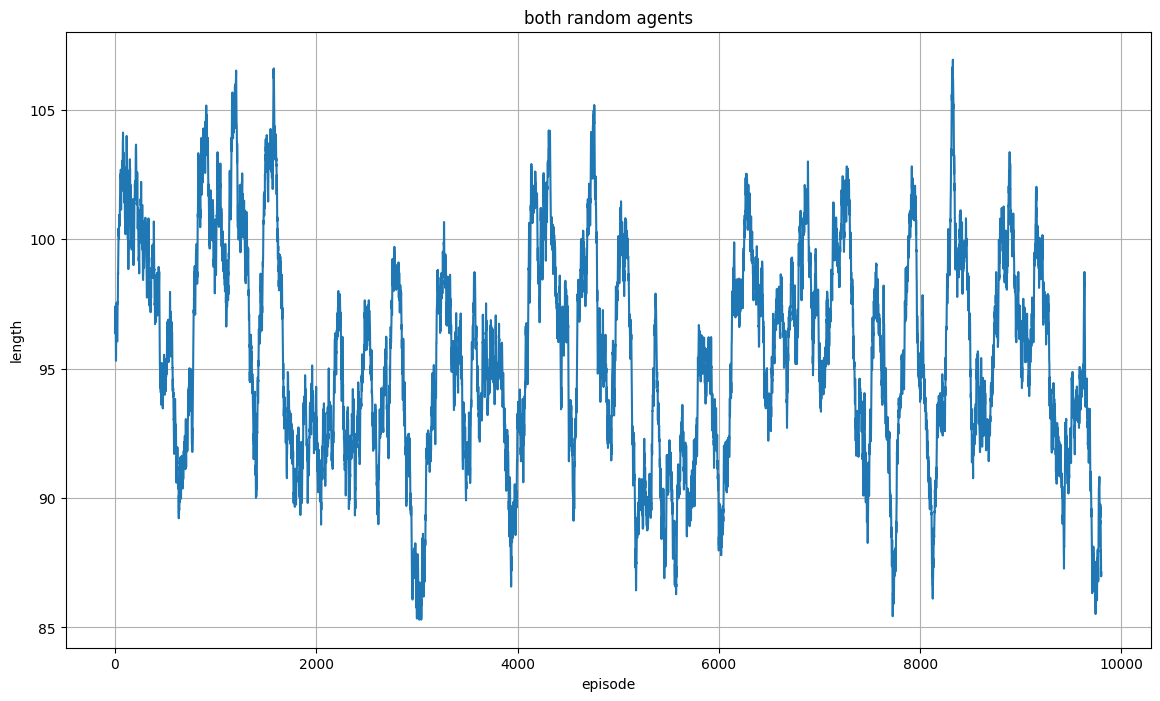

In [4]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("both random agents")


plt.show()

## Q vs Random

Ok, now lets see how a Q-learning agent performs against a random one.

In [5]:
agent_1 = QAgent(
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
    alpha=0.3,
    epsilon=0.01,
)

agent_2 = RandomAgent(
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
)


episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=200,
)

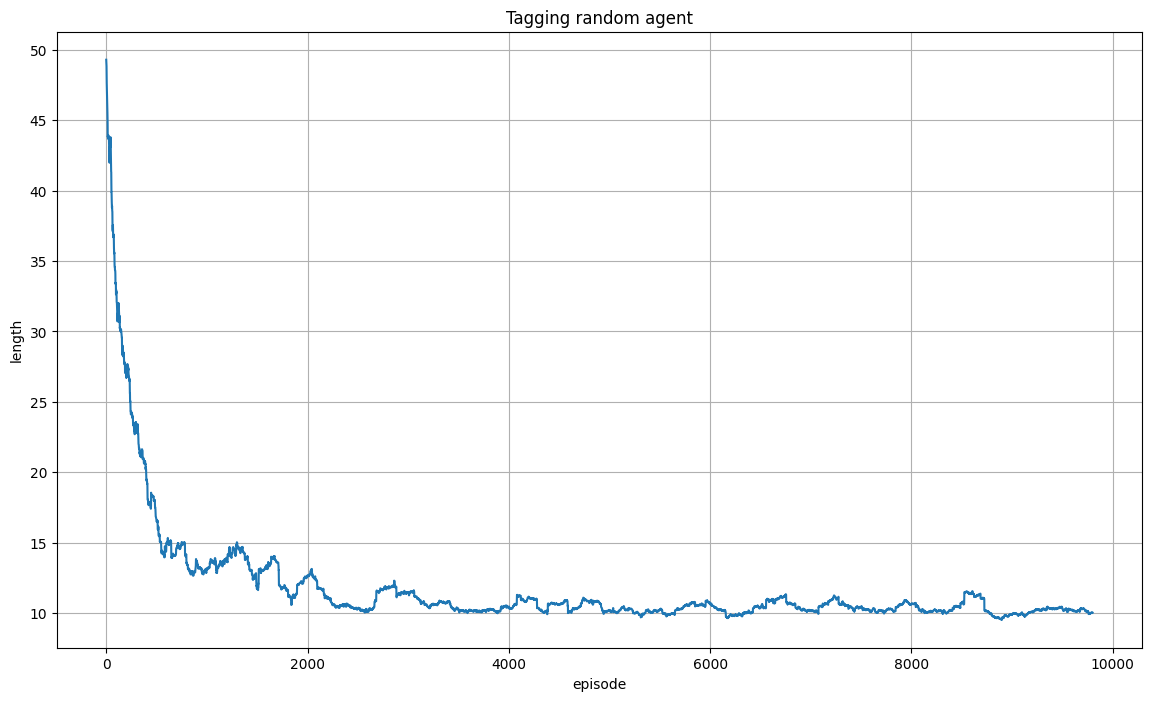

In [6]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Tagging random agent")


plt.show()

In [7]:
agent_1 = RandomAgent(
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
)

agent_2 = QAgent(
    reward_function=basic_running_reward,
    actions=basic_actions,
    gamma=1,
    alpha=0.3,
    epsilon=0.01,
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=500,
)

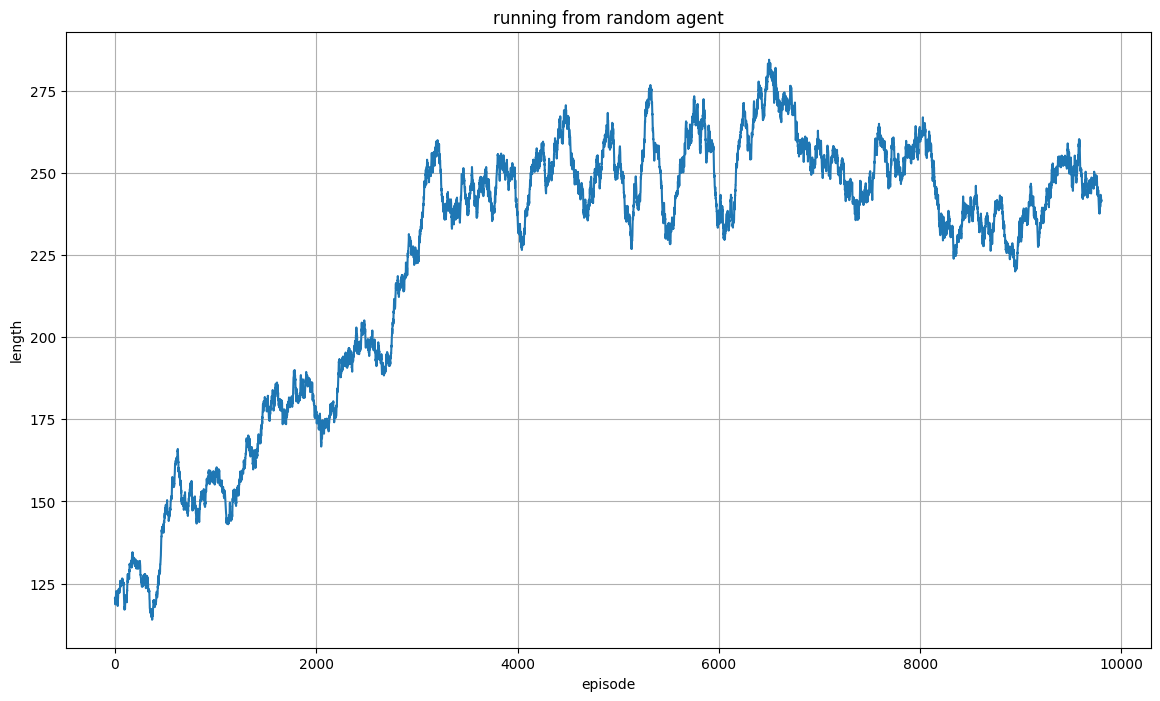

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("running from random agent")


plt.show()

Using q-learn we can have the first agent catch a random agent pretty fast. We can also teach the second agent to extend the episodes quite a lot.  

## Adversarial Q-Agents

Finally lets see what happens with two Q-agents going against each other.

In [9]:
agent_1 = QAgent(
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
    alpha=0.3,
    epsilon=0.01,
)

agent_2 = QAgent(
    reward_function=basic_running_reward,
    actions=basic_actions,
    gamma=1,
    alpha=0.3,
    epsilon=0.01,
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e5),
    episode_max_length=500,
)

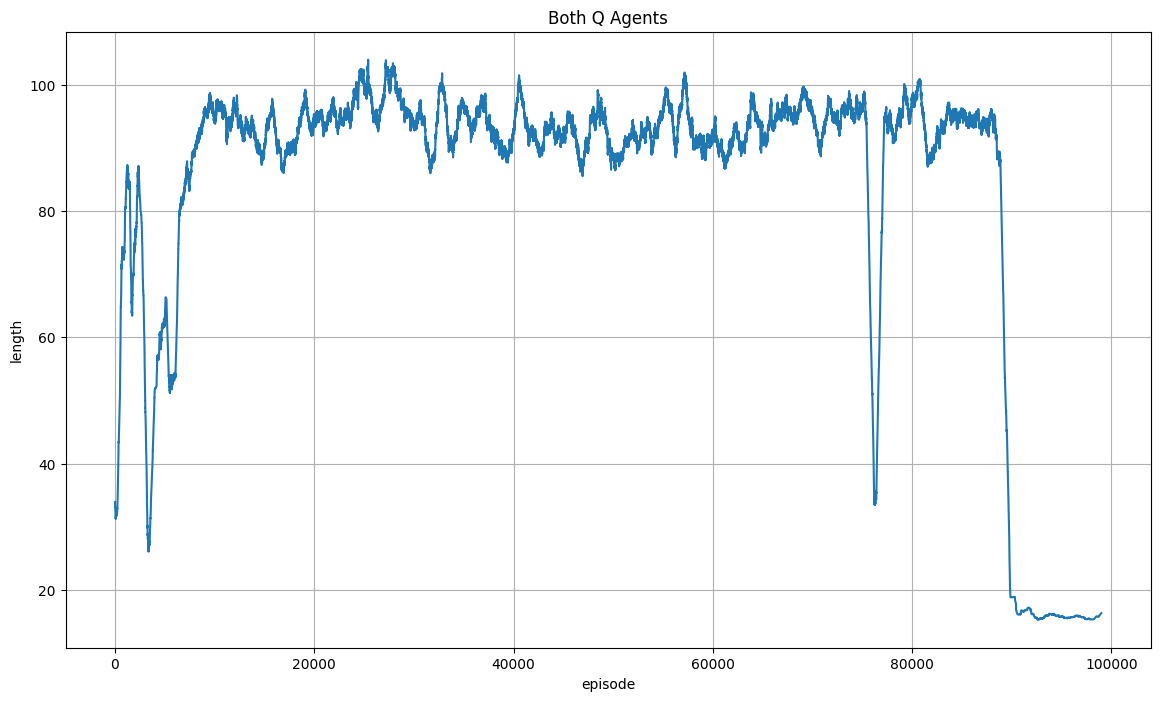

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 1000),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Both Q Agents")


plt.show()

This looks pretty cool. At the beggining there is a lot of variation, then Agent 2 is able to get some long rounds for quite a while, but eventually Agent 1 learns a good strategy; of course if we leet this run even longer Agent 2 may also improve. Even though this is a small world tt takes quite a while for the agents to learn, showing how much harder this problem is.

In general it seems Agent 2 has some advantages in this problem, so lets see what hapens if we give Agent 1 a new action: the possibility to "wait" for a move.

In [11]:
agent_1 = QAgent(
    reward_function=basic_reward,
    actions=basic_actions + [GWorldAction.wait],
    gamma=1,
    alpha=0.3,
    epsilon=0.01,
)

agent_2 = QAgent(
    reward_function=basic_running_reward,
    actions=basic_actions,
    gamma=1,
    alpha=0.3,
    epsilon=0.01,
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e5),
    episode_max_length=500,
)

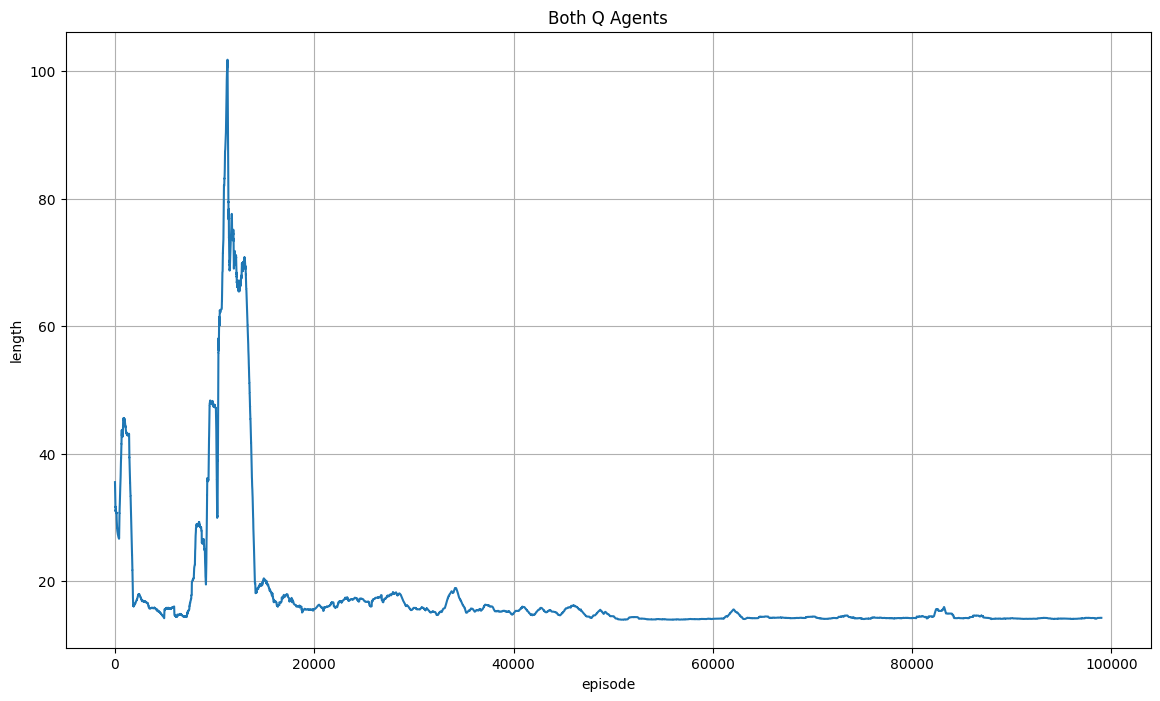

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 1000),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Both Q Agents")


plt.show()

Even though, at first glance, this may not look like a great action the agent really learns to make use of it, and its performance improves a lot(if you know your chess endgames this is probably not surprising though).